#🚢 Titanic Dataset: Data Loading & Library Import

##📚 Imported essential libraries:

pandas → for data handling

train_test_split → to split data into training & testing

LogisticRegression → machine learning model

accuracy_score, classification_report, confusion_matrix → evaluation metrics

📂 Loaded the Titanic dataset from CSV file into a DataFrame (df).

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pandas as pd
df=pd.read_csv("/content/Titanicdata.csv")

#👤 Encoding and Selecting Relevant Features

Encoding: The Sex column is converted from categorical values (male/female) to numeric (1/0) for model compatibility.

Feature Selection: Only relevant columns are kept:

Pclass → Passenger class

Sex → Gender

Age → Age of passenger

Fare → Ticket fare

Survived → Target variable

This step ensures the dataset is ready for model training. ✅

In [29]:
df['Sex']=df['Sex'].map({"male":1,"female":0})
df=df[['Pclass', 'Sex', 'Age', 'Fare','Survived']]

In [30]:
df = df.dropna()

#🧹 Handling Missing Values

Numeric columns: Missing values are filled with the median to avoid skewing the data.

Categorical columns (object type): Missing values are filled with the mode (most frequent value).

Verification: df.isnull().sum() checks that all missing values have been handled.

This ensures the dataset has no NaN values and is ready for model training. ✅

In [54]:
df.fillna(df.median(numeric_only = True), inplace = True)

# Filling missing Object values
for col in df.select_dtypes(include = ['object']):
    df[col].fillna(df[col].mode()[0], inplace = True)

df.isnull().sum()

/tmp/ipython-input-4056724582.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#⚖️ Feature Scaling with StandardScaler

Purpose: Logistic Regression performs better when numerical features are scaled.

Method: StandardScaler standardizes features by removing the mean and scaling to unit variance.

Result: X_scaled contains the scaled versions of all features, ready for model training. ✅

In [57]:
#Logistic regression works better with scaled data:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#⚙️ Training Logistic Regression Model

Features (X): Pclass, Sex, Age, Fare

Target (y): Survived

Train/Test Split: 80% training, 20% testing (train_test_split)

Model: Logistic Regression trained on the training set

Predictions: y_pre = model.predict(X_test)

This step builds the classification model to predict passenger survival on unseen test data. ✅

In [48]:
X=df[['Pclass', 'Sex', 'Age', 'Fare']]
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pre=model.predict(X_test)

#📈 Model Evaluation Metrics

Accuracy: accuracy_score – measures overall correctness of predictions

Confusion Matrix: confusion_matrix – shows true positives, true negatives, false positives, and false negatives

Classification Report: classification_report – includes precision, recall, F1-score for each class

This step evaluates how well the logistic regression model predicts passenger survival on the test set. ✅

In [49]:
acc=accuracy_score(y_test,y_pre)
print(f"accuracy {acc}")
print(f"confusion_mtric{confusion_matrix(y_test,y_pre)}")
print(f"classification_report {classification_report(y_test,y_pre)}")

accuracy 0.7762237762237763
confusion_mtric[[68 16]
 [16 43]]
classification_report               precision    recall  f1-score   support

           0       0.81      0.81      0.81        84
           1       0.73      0.73      0.73        59

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



#🔮 Predicting Survival for New Passengers

Input: A new dataset (new_data) with passenger features: Pclass, Sex, Age, Fare.

Prediction: The trained logistic regression model predicts survival:

1 → Survived

0 → Not Survived

Probability Scores: Shows the model’s confidence for each class:

Probability of Survived

Probability of Not Survived

This step demonstrates how the model can be applied to unseen passenger data for predictions. ✅

In [50]:
new_data = pd.DataFrame({
    'Pclass': [1, 3, 2, 3],
    'Sex': [0, 1, 0, 1],      # 0 = male, 1 = female
    'Age': [29, 22, 45, 18],
    'Fare': [72.5, 7.25, 15.0, 9.5]
})
prediction=model.predict(new_data)
print(f"prediction ,survived" if prediction[0]==1 else "non_survived")
probability=model.predict_proba(new_data)
print(f"probabiity of survived is {round(probability[0][0],2)}")
print(f"probabiity of non_survived is {round(probability[0][1],2)}")

prediction ,survived
probabiity of survived is 0.06
probabiity of non_survived is 0.94


In [51]:
new_data = pd.DataFrame({
    'Pclass': [2, 1, 3, 1, 2],
    'Sex': [1, 0, 1, 1, 0],     # 0 = male, 1 = female
    'Age': [34, 40, 19, 25, 60],
    'Fare': [13.0, 80.0, 8.05, 110.5, 15.5]
})
predictions=model.predict(new_data)
print("survived" if predictions[0]==1 else "non_sirvived")

non_sirvived


#📊 Visualizing Predicted Survival Counts

Purpose: To quickly see how many passengers in new_data are predicted to survive or not survive.

Method:

Predictions from the trained logistic regression model are added to the dataset (Predicted_Survived).

seaborn.countplot shows the count of each predicted class (0 = Not Survived, 1 = Survived).

Axes:

X-axis: Predicted survival class

Y-axis: Number of passengers

This visualization helps understand the model’s predictions at a glance. ✅

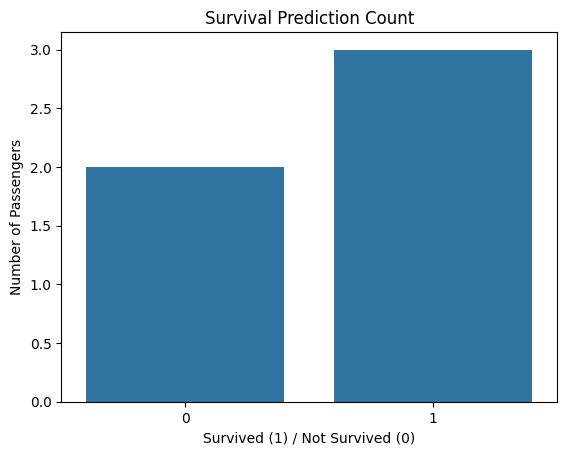

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
predictions = model.predict(new_data)
new_data['Predicted_Survived'] = predictions
sns.countplot(x='Predicted_Survived', data=new_data)
plt.title('Survival Prediction Count')
plt.xlabel('Survived (1) / Not Survived (0)')
plt.ylabel('Number of Passengers')
plt.show()
